<a href="https://colab.research.google.com/github/inefable12/upn2024/blob/main/Clase2_B_Scielo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://media.giphy.com/avatars/UPN_edu/BohC4JwcStCB.gif" width="100" alt="nlp logo"  />

___

$$\large\textbf{Codificación para el análisis de datos para no programadores}$$
$$\textit{Parte Práctica B: Procesamiento de Lenguaje Natural}$$

_Docente: Jesus Alvarado Huayhuaz_

_13 de diciembre de 2024_
___

<img src="https://datasciencedojo.com/wp-content/uploads/MicrosoftTeams-image-34-1.jpg" width="300" alt="nlp ogo"  />

# 1. Instalar requerimientos

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [2]:
# Dar enter para continuar
!conda install -c anaconda nltk

Channels:
 - anaconda
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       h06a4308_0         138 KB  anaconda
    certifi-2024.8.30          |  py310h06a4308_0         164 KB  anaconda
    click-8.1.7                |  py310h06a4308_0         151 KB  anaconda
    conda-23.11.0              |  py310h06a4308_0        1013 KB  anaconda
    joblib-1.4.2               |  py310h06a4308_0         407 KB  anaconda
    nltk-3.9.1                 |  py310h06a4308_0         2.2 MB  anaconda
    regex-2024.9.11  

**Nota**:

Hasta aquí probablemente te apareció un mensaje del reinicio de la sesión.

No te preocupes, ejecuta la siguiente celda para verificar la instalación

In [1]:
!conda --version

conda 23.11.0


In [2]:
import nltk

In [3]:
nltk.download()
# "q" para salir
# nltk.download('stopwords'), esta descarga es requerida más adelante

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# 2. Análisis de artículo científico en Scielo

Vamos a trabajar con el siguiente artículo en español:

http://www.scielo.org.pe/scielo.php?script=sci_abstract&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es

## 2.1 Web scrapping

In [75]:
import urllib.request

# Add headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}
#req = urllib.request.Request('http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es', headers=headers)
req = urllib.request.Request('http://www.scielo.org.pe/scielo.php?script=sci_abstract&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es', headers=headers)

try:
    response = urllib.request.urlopen(req)
    # Process the response here
except urllib.error.HTTPError as e:
    print(f"HTTP Error: {e.code} - {e.reason}")
except urllib.error.URLError as e:
    print(f"URL Error: {e.reason}")

In [76]:
html = response.read()

In [77]:
print(html)

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:mml="http://www.w3.org/1998/Math/MathML"><head><title>Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silico</title><meta http-equiv="Pragma" content="no-cache"></meta><meta http-equiv="Expires" content="Mon, 06 Jan 1990 00:00:01 GMT"></meta><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"></meta><meta name="citation_journal_title" content="Revista de la Sociedad Qu\xc3\xadmica del Per\xc3\xba"></meta><meta name="citation_publisher" content=""></meta><meta name="citation_title" content="Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silico"></meta><meta name="citation_date" content="01/2023"></meta><meta name="citation_volume" content="89"></meta><meta 

In [78]:
from bs4 import BeautifulSoup
import string

In [79]:
# Limpiar etiquetas HTML
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)

In [80]:
print(text)

Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silicoServicios PersonalizadosRevistaSciELO AnalyticsGoogle Scholar H5M5 ()$(document).ready(function() {
                  var url =  "/google_metrics/get_h5_m5.php?issn=1810-634X&callback=?";
                  $.getJSON(url,  function(data) {
                      $("#google_metrics_year").html(data['year']);
                      $('#google_metrics_link').attr('href', data['url']);
                      $("#google_metrics_link_li").show();
                  });
              });ArticuloEspañol (pdf)Articulo en XMLReferencias del artículoComo citar este artículoSciELO AnalyticsTraducción automáticaEnviar articulo por emailIndicadoresCitado por SciELOLinks relacionadosSimilares en
    SciELOCompartirOtrosOtrosPermalinkRevista de la Sociedad Química del Perúversión impresaISSN1810-634XResumenALVARADO-HUAYHUAZ,  Jesús;PUMA ZAMORA,  Wilmar;BRAGA,  Ataualpa C.yVALDERRAM

## 2.2 Tokenizar texto

In [81]:
# Convertir texto en tokens
tokens = [t for t in text.split()]

In [82]:
print(tokens)

['Reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoServicios', 'PersonalizadosRevistaSciELO', 'AnalyticsGoogle', 'Scholar', 'H5M5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634X&callback=?";', '$.getJSON(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});ArticuloEspañol', '(pdf)Articulo', 'en', 'XMLReferencias', 'del', 'artículoComo', 'citar', 'este', 'artículoSciELO', 'AnalyticsTraducción', 'automáticaEnviar', 'articulo', 'por', 'emailIndicadoresCitado', 'por', 'SciELOLinks', 'relacionadosSimilares', 'en', 'SciELOCompartirOtrosOtrosPermalinkRevista', 'de', 'la', 'Sociedad', 'Química', 'del', 'Perúversión', 'impresaISSN1810-634XResumenALVARADO-HUAYHUAZ,', 'Jesú

In [83]:
# convert a minuscula
tokens = [w.lower() for w in tokens]

In [84]:
print(tokens)

['reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'h5m5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634x&callback=?";', '$.getjson(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});articuloespañol', '(pdf)articulo', 'en', 'xmlreferencias', 'del', 'artículocomo', 'citar', 'este', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'por', 'emailindicadorescitado', 'por', 'scielolinks', 'relacionadossimilares', 'en', 'scielocompartirotrosotrospermalinkrevista', 'de', 'la', 'sociedad', 'química', 'del', 'perúversión', 'impresaissn1810-634xresumenalvarado-huayhuaz,', 'jesú

In [85]:
"abc".isalpha()

True

In [86]:
"123".isalpha()

False

In [87]:
# remover signos de puntuacion
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# eliminar tokens restantes que no son alfabeticos
words = [word for word in stripped if word.isalpha()]

In [88]:
print(words)

['reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue', 'un', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'documentreadyfunction', 'var', 'url', 'getjsonurl', 'functiondata', 'googlemetricsyearhtmldatayear', 'googlemetricslinkattrhref', 'dataurl', 'googlemetricslinklishow', 'articuloespañol', 'pdfarticulo', 'en', 'xmlreferencias', 'del', 'artículocomo', 'citar', 'este', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'por', 'emailindicadorescitado', 'por', 'scielolinks', 'relacionadossimilares', 'en', 'scielocompartirotrosotrospermalinkrevista', 'de', 'la', 'sociedad', 'química', 'del', 'perúversión', 'jesúspuma', 'zamora', 'wilmarbraga', 'ataualpa', 'cyvalderrama', 'negron', 'ana', 'ceciliareconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio', 'galio', 'y', 'hierro', 'en', 'el'

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
# Limpiar stopwords
from nltk.corpus import stopwords

In [97]:
# filtrar las palabras de parada
stop_words = set(stopwords.words('spanish'))  # convertir a conjunto
words = [w for w in words if not w in stop_words]

In [98]:
print(words)

['reconocimiento', 'molecular', 'complejos', 'desferrioxamina', 'aluminio', 'galio', 'hierro', 'receptor', 'fhue', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'documentreadyfunction', 'var', 'url', 'getjsonurl', 'functiondata', 'googlemetricsyearhtmldatayear', 'googlemetricslinkattrhref', 'dataurl', 'googlemetricslinklishow', 'articuloespañol', 'pdfarticulo', 'xmlreferencias', 'artículocomo', 'citar', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'emailindicadorescitado', 'scielolinks', 'relacionadossimilares', 'scielocompartirotrosotrospermalinkrevista', 'sociedad', 'química', 'perúversión', 'jesúspuma', 'zamora', 'wilmarbraga', 'ataualpa', 'cyvalderrama', 'negron', 'ana', 'ceciliareconocimiento', 'molecular', 'complejos', 'desferrioxamina', 'aluminio', 'galio', 'hierro', 'receptor', 'fhue', 'estudioin', 'silicorev', 'soc', 'quím', 'perúonline', 'epub', 'issn', 'organización', 'mundial', 'salud', 'categori

In [99]:
print(tokens)

['reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'h5m5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634x&callback=?";', '$.getjson(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});articuloespañol', '(pdf)articulo', 'en', 'xmlreferencias', 'del', 'artículocomo', 'citar', 'este', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'por', 'emailindicadorescitado', 'por', 'scielolinks', 'relacionadossimilares', 'en', 'scielocompartirotrosotrospermalinkrevista', 'de', 'la', 'sociedad', 'química', 'del', 'perúversión', 'impresaissn1810-634xresumenalvarado-huayhuaz,', 'jesú

In [100]:
# Contar frecuencia de palabras
freq = nltk.FreqDist(words)

for key,val in freq.items():
    pass
    #print (str(key) + ':' + str(val))

In [101]:
freq.most_common(10)

[('molecular', 6),
 ('complejos', 5),
 ('fhue', 5),
 ('reconocimiento', 4),
 ('desferrioxamina', 4),
 ('aluminio', 4),
 ('efecto', 4),
 ('fedfo', 4),
 ('galio', 3),
 ('hierro', 3)]

## 2.3 Nube de palabras

In [103]:
# Graficos
import matplotlib.pyplot as plt

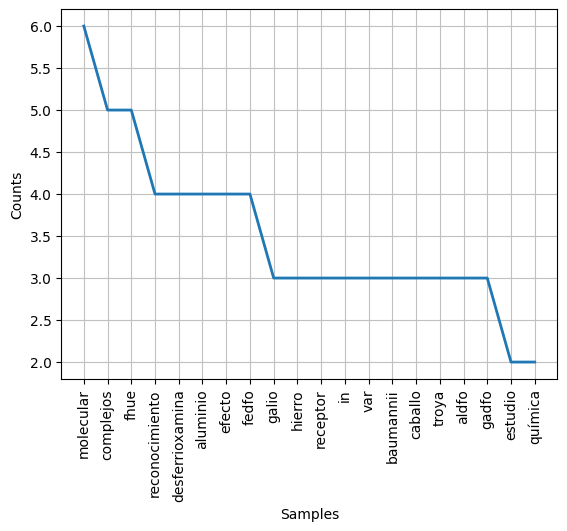

In [104]:
freq.plot(20, cumulative=False)
plt.show()

In [105]:
from wordcloud import WordCloud

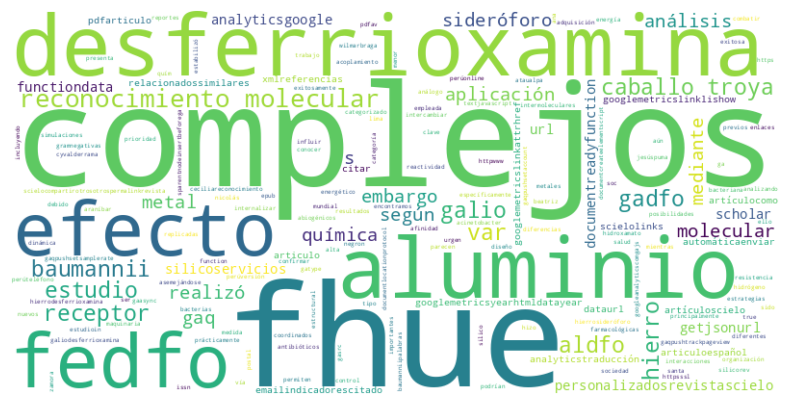

In [106]:
# Importar la librería wordcloud
from wordcloud import WordCloud

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Actividad 1

Realiza un tratamiento del texto en el siguiente artículo y elabora una nube de palabras según la frecuencia de uso:

https://www.nytimes.com/article/what-is-coronavirus.html